## Linear pulse propagation

$E(z,t) = A(t)\cos(\omega t)$

Gaussian pulse:
$A(t) = exp(-t^2/T^2)$

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.constants import pi, c

#The following hack is for importing a module from the "Modules" folder
import os
cwd = os.getcwd()
os.chdir('..')
from Modules.analysis import FTX, IFTX
from Modules.materials import *
from Modules.waveguides import *
os.chdir(cwd)

In [34]:
c = c*1e-6; #um/ps

### Envelope

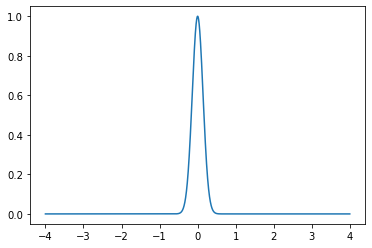

In [18]:
tp = 0.2
ts = tp/100 #Sampling period

t = np.arange(-4,4,ts)

a_in =  np.exp(-t**2/tp**2)
plt.plot(t,a_in)

### Field

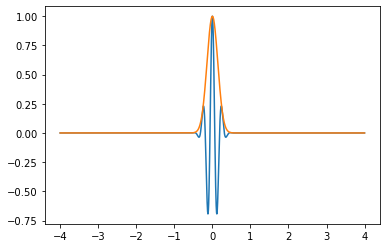

In [19]:
w0 = 5/tp
e_carrier = np.exp(1j*w0*t)
e_in = np.real(a_in*e_carrier)
plt.plot(t,e_in,t,a_in);

### Spectrum

Text(0.5, 0, 'Frequency')

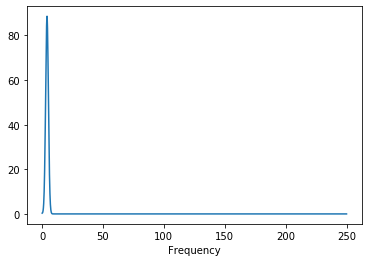

In [20]:
E_in, freqs = FTX(e_in, ts, NFFT=len(e_in))
#plt.plot(freqs[0:100], abs(E_in[0:100]))
plt.plot(freqs, abs(E_in))
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

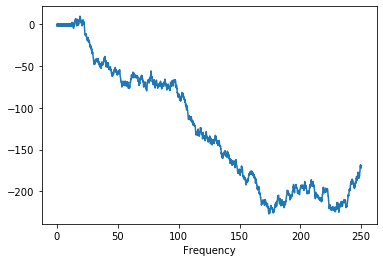

In [21]:
# plt.plot(freqs[0:100], np.unwrap(np.angle(E_in[0:100]))*180/pi)
plt.plot(freqs, np.unwrap(np.angle(E_in)*180/pi))
plt.xlabel('Frequency')

### Linear prop

Text(0.5, 0, 'Frequency')

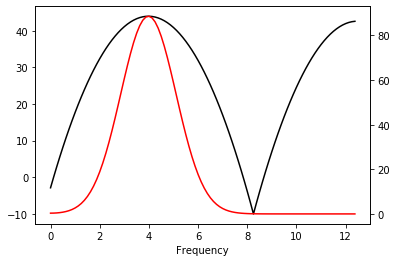

In [35]:
L = 1.5
bo = 0
b1 = 0
b2 = -0.1
b3 = 0.0
w = 2*pi*freqs
beta = bo + b1*(w-w0) + b2*(w-w0)**2/2 + b3*(w-w0)**3/6
H = np.exp(1j*beta*L)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 

ax1.plot(freqs[0:100], np.unwrap(np.angle(H[0:100])), 'k')
ax2.plot(freqs[0:100], abs(E_in[0:100]), 'r')
ax1.set_xlabel('Frequency')

### Output signal

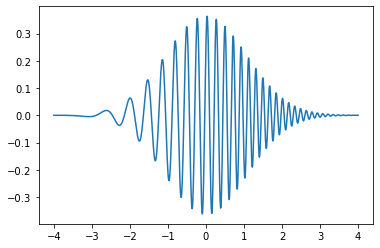

In [36]:
E_out = E_in*H
df = freqs[1]-freqs[0]
e_out, tout = IFTX(E_out, df, len(e_in))

#plt.plot(t, e_out, t, e_in)
plt.plot(t, e_out)

### Waveguide

In [38]:
wl = c/freqs

n0 = 1
nLN = refractive_index('LN_MgO_e', wl)
nSiO2 = refractive_index('SiO2', wl)
dslab = 0.45
dridge = 0.7
wridge = 1.5

n_slab = np.zeros(wl.shape)
n_ridge = np.zeros(wl.shape)
neff = np.zeros(wl.shape)
for kw in range(wl.size):
    n_slab[kw]= neff_asymmetric_slab(n0, nLN[kw], nSiO2[kw], dslab, wl[kw], mode='TE even', order=0)
    n_ridge[kw]= neff_asymmetric_slab(n0, nLN[kw], nSiO2[kw], dridge, wl[kw], mode='TE even', order=0)
    neff[kw] = neff_symmetric_slab(n_slab[kw], n_ridge[kw], wridge, wl[kw], mode='TM even', order=0)

C:\Users\luish\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


RuntimeError: Failed to converge after 100 iterations.